In [11]:
import pandas as pd

In [12]:
mydataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

myvar = pd.DataFrame(mydataset)

print(myvar)

    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


In [13]:
#Pandas Series
#A Pandas Series is like a column in a table.
a= [1, 7, 2]
myvar = pd.Series(a)
print(myvar)

#Lables
a = [1, 7, 2]
myvar = pd.Series(a, index = ["x", "y", "z"])
print(myvar)
#When you have created labels, you can access an item by referring to the label.
print(myvar["y"])

0    1
1    7
2    2
dtype: int64
x    1
y    7
z    2
dtype: int64
7


In [14]:
#Key/Value Objects as Series
#You can also use a key/value object, like a dictionary, when creating a Series.
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories)
print(myvar)
#Note: The keys of the dictionary become the labels.

#Create a Series using only data from "day1" and "day2":
myvar = pd.Series(calories, index = ["day1", "day2"])
print(myvar)


day1    420
day2    380
day3    390
dtype: int64
day1    420
day2    380
dtype: int64


In [15]:
#DataFrames
#Series is like a column, a DataFrame is the whole table.
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
#load data into a DataFrame object:
df = pd.DataFrame(data)
print(df)

#Pandas use the loc attribute to return one or more specified row(s)
print(df.loc[0]) #Note: This example returns a Pandas Series.
print(df.loc[[0,1]]) #Note: When using [], the result is a Pandas DataFrame.

   calories  duration
0       420        50
1       380        40
2       390        45
calories    420
duration     50
Name: 0, dtype: int64
   calories  duration
0       420        50
1       380        40


In [16]:
#Name index
df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(df) 
#refer to the named index:
print(df.loc["day2"])


      calories  duration
day1       420        50
day2       380        40
day3       390        45
calories    380
duration     40
Name: day2, dtype: int64


In [17]:
#Load Files Into a DataFrame
#Load a comma separated file (CSV file) into a DataFrame:
df = pd.read_csv('data.csv')
#Tip: use to_string() to print the entire DataFrame.
print(df.to_string())

#If you have a large DataFrame with many rows, Pandas will only return the first 5 rows, and the last 5 rows if you don't use to_string()
#You can check your system's maximum rows with the pd.options.display.max_rows statement.
print(pd.options.display.max_rows) #60

#Increase the maximum number of rows to display the entire DataFrame, insert before print
pd.options.display.max_rows = 9999

#Tương tự với file json, JSON objects have the same format as Python dictionaries. JSON = Python Dictionary
data = pd.read_json('data.json')
print(data)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

In [18]:
#The head() method returns the headers and a specified number of rows, starting from the top.

#Print the first/last 5 rows of the DataFrame:
print(df.head())
print(df.tail()) 

#Print the first/last 10 rows of the DataFrame:
print(df.head(10))
print(df.tail(10))

#The DataFrames object has a method called info(), that gives you more information about the data set.
print(df.info()) 

#Null Values
#The info() method also tells us how many Non-Null values there are present in each column, and in our data set it seems like there are 164 of 169 Non-Null values in the "Calories" column.
#Which means that there are 5 rows with no value at all, in the "Calories" column, for whatever reason.
#Empty values, or Null values, can be bad when analyzing data, and you should consider removing rows with empty values. This is a step towards what is called cleaning data.

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
     Duration  Pulse  Maxpulse  Calories
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.0
6        60    110       136     374.0
7        45    104       134     253.3
8        30    109       133     195.1
9        60     98       124     269.0
     Duration  Pulse  Maxpulse  Calories
159        30     80       120     240.9
160      

Data cleaning

Data cleaning means fixing bad data in your data set.
Bad data could be:
Empty cells
Data in wrong format
Wrong data
Duplicates

In this tutorial you will learn how to deal with all of them.

In [19]:
#Cleaning Empty Cells
#remove cell
df = pd.read_csv('data.csv')

new_df = df.dropna()
print(new_df.to_string())

#Note: By default, the dropna() method returns a new DataFrame, and will not change the original.
#If you want to change the original DataFrame, use the inplace = True argument:
df.dropna(inplace = True)
print(df)
#Note: Now, the dropna(inplace = True) will NOT return a new DataFrame, but it will remove all rows containing NULL values from the original DataFrame.

#replace empty values
#The fillna() method allows us to replace empty cells with a value:
df.fillna(130, inplace = True)

#Replace Only For Specified Columns
df["Calories"].fillna(130, inplace = True)

#Replace Using Mean, Median, or Mode
#Pandas uses the mean() median() and mode() methods to calculate the respective values for a specified column:

#Mean: Mean = the average value (the sum of all values divided by number of values).
x = df["Calories"].mean()
df["Calories"].fillna(x, inplace = True)
#Median: Median = the value in the middle, after you have sorted all values ascending.
x = df["Calories"].median()
df["Calories"].fillna(x, inplace = True)
#Mode: Mode = the value that appears most frequently.

x = df["Calories"].mode()[0]

df["Calories"].fillna(x, inplace = True)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45    105       132     246.0
24         60   

In [20]:
#Data of Wrong Format
#remove the rows, or convert all cells in the columns into the same format.
#Let's try to convert all cells in the 'Date' column into dates.
df['Date'] = pd.to_datetime(df['Date'])
#Remove rows with a NULL value in the "Date" column:
df.dropna(subset=['Date'], inplace = True)

KeyError: 'Date'

In [ ]:
#Replacing Values
df.loc[7,'Duration'] = 45 #giả sử ban đầu sai
#If the value is higher than 120, set it to 120:
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.loc[x, "Duration"] = 120
    
#Delete rows where "Duration" is higher than 120:
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.drop(x, inplace = True)

In [ ]:
#Removing Duplicates
print(df.duplicated()) #Tìm dòng bị trùng
df.drop_duplicates(inplace = True) #xóa
#Remember: The (inplace = True) will make sure that the method does NOT return a new DataFrame, but it will remove all duplicates from the original DataFrame.

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36      True
37      True
38      True
39     False
40      True
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71      True
72     False
73     False
74     False
75     False
76     False
77     False
78     False

Data Correlations
Finding Relationships
Note: The corr() method ignores "not numeric" columns.

Result Explained
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.


In [ ]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.251712,-0.086029,0.820359
Pulse,-0.251712,1.000000,0.784994,0.015301
Maxpulse,-0.086029,0.784994,1.000000,0.195309
Calories,0.820359,0.015301,0.195309,1.000000


Plotting
Pandas uses the plot() method to create diagrams.
We can use Pyplot, a submodule of the Matplotlib library to visualize the diagram on the screen.
Read more about Matplotlib in our Matplotlib Tutorial.
Import pyplot from Matplotlib and visualize our DataFrame:

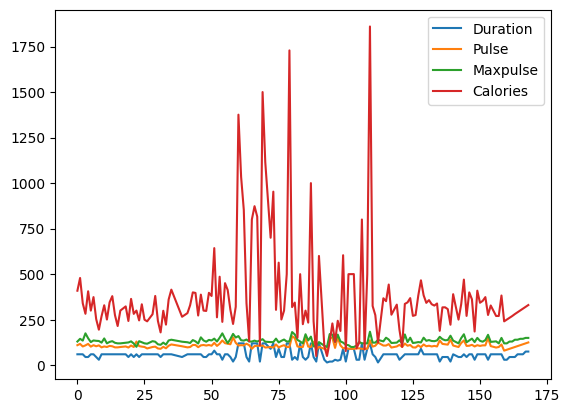

In [ ]:
import matplotlib.pyplot as plt

df.plot()
plt.show()


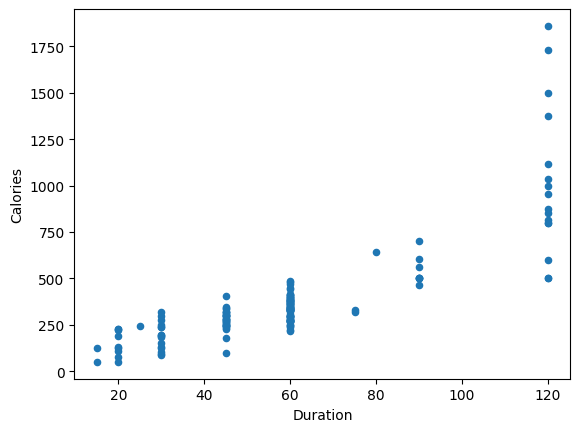

In [ ]:
#Scatter plot
#A scatter plot needs an x- and a y-axis.
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')
plt.show()

<Axes: ylabel='Frequency'>

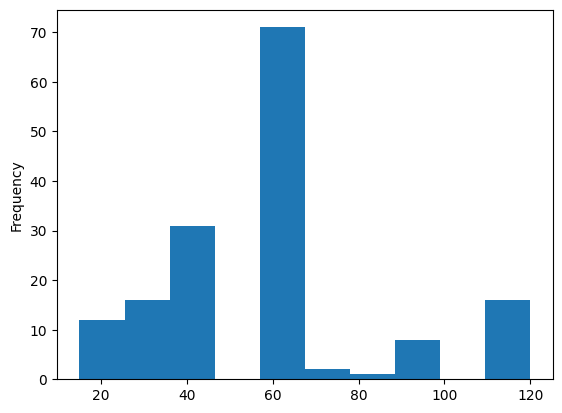

In [ ]:
#Histogram
#A histogram needs only one column.
#A histogram shows us the frequency of each interval
df["Duration"].plot(kind = 'hist')
